In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip /content/dogs-vs-cats.zip -d /content/

Archive:  /content/dogs-vs-cats.zip
replace /content/dogs_vs_cats/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/dogs_vs_cats/test/cats/cat.10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/dogs_vs_cats/test/cats/cat.10001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/dogs_vs_cats/test/cats/cat.10007.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/dogs_vs_cats/test/cats/cat.10017.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [5]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

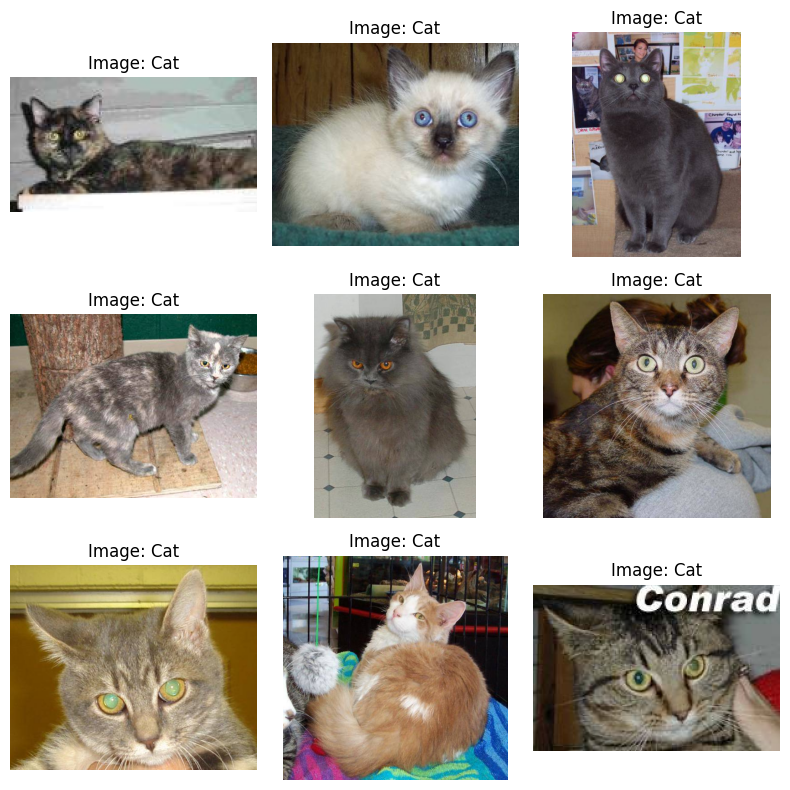

In [6]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs_vs_cats/train/cats'  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

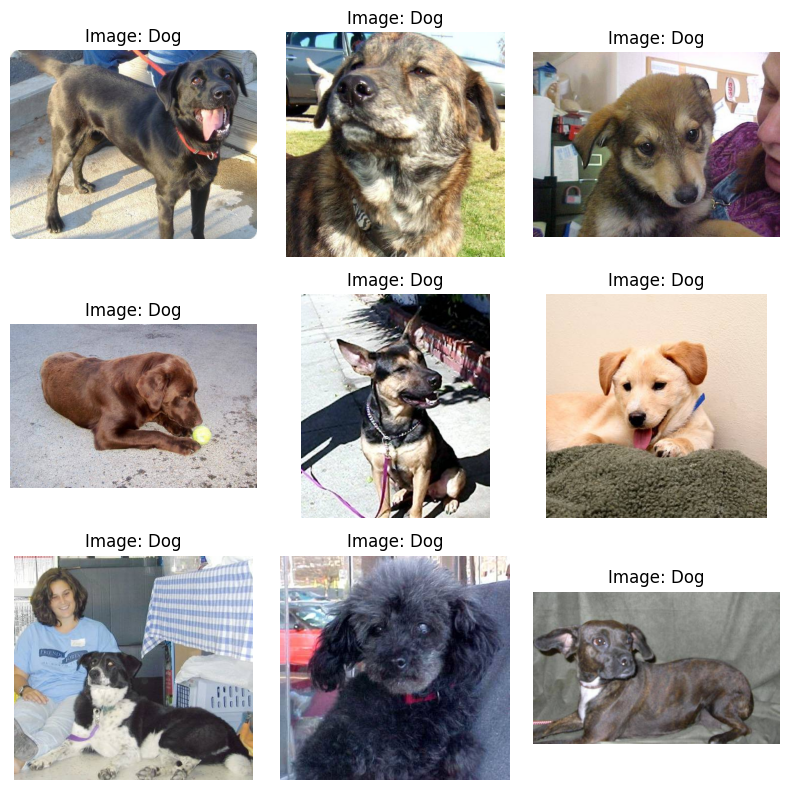

In [7]:
# Placeholder for the directory path
dog_directory_path = '/content/dogs_vs_cats/train/dogs'  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

In [8]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


(-1.1, 1.1, -1.1, 1.1)

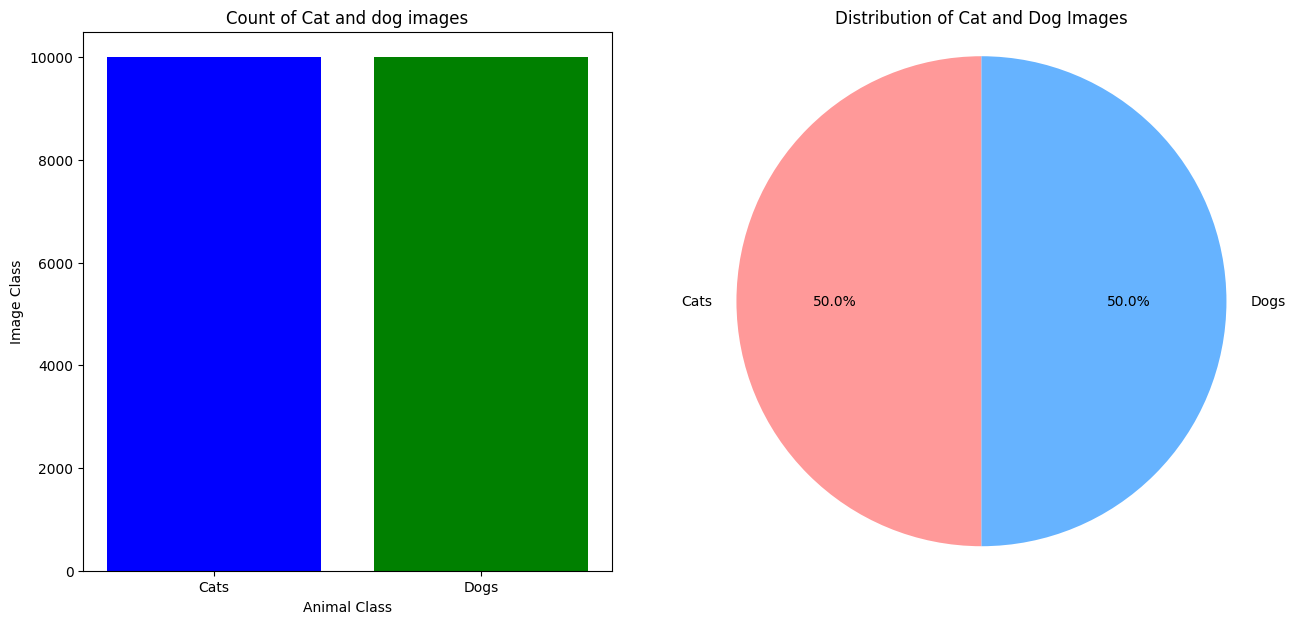

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

ax[0].bar(classes_animals,count, color=['blue','green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Class')
ax[0].set_title('Count of Cat and dog images')

colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animals,colors=colors,autopct='%1.1f%%',startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')

In [10]:
import cv2
import imghdr

image_exts = ['jpeg','jpg','png']

data_dir = '/content/dogs_vs_cats'


for root , dirs , files in os.walk(data_dir):
  for file in files:

    file_path = os.path.join(root, file)

    try:

      file_types = imghdr.what(file_path)

      if file_types not in image_exts:
        print(f"Image not in ext list {file_path}")
      else:
        img = cv2.imread(file_path)

    except Exception as e:
      print(f"Isse with file {file_path}.Error{e}")

      os.remove(file_path)

In [11]:
def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
      image_array = np.array(img)
      return image_array
  except:
    print(f"Could not read the image file at {image_path}")
    return None

array([[[ 26,  30,  39],
        [ 24,  28,  37],
        [ 19,  23,  32],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [125, 157, 154]],

       [[ 29,  33,  42],
        [ 29,  33,  42],
        [ 26,  30,  39],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [124, 156, 153]],

       [[ 30,  34,  43],
        [ 34,  38,  47],
        [ 35,  39,  48],
        ...,
        [127, 159, 156],
        [126, 158, 155],
        [124, 156, 153]],

       ...,

       [[165, 151, 114],
        [163, 149, 110],
        [156, 142, 103],
        ...,
        [175, 170,   6],
        [172, 166,   6],
        [166, 160,   2]],

       [[160, 146, 111],
        [159, 145, 108],
        [153, 139, 102],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]],

       [[154, 140, 105],
        [154, 140, 103],
        [150, 136,  99],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]]], dtype=uint8)
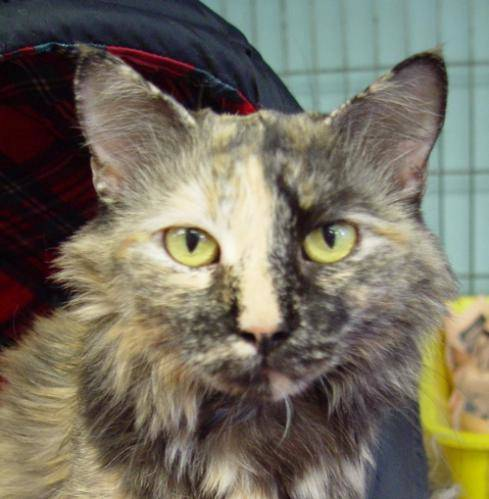

In [12]:
image_to_array('/content/dogs_vs_cats/test/cats/cat.10.jpg')

In [13]:
image = '/content/dogs_vs_cats/test/cats/cat.10021.jpg'

img = cv2.imread(image)

if img is not None:
  print(img)
  print(img.shape)
else:
  print("The image could not be loaded. Please check the path and file permissions.")

[[[178 124  64]
  [183 131  71]
  [193 139  84]
  ...
  [ 17  92 130]
  [ 17  92 130]
  [ 17  92 130]]

 [[179 125  65]
  [185 131  71]
  [191 137  82]
  ...
  [ 17  92 130]
  [ 17  92 130]
  [ 17  92 130]]

 [[179 123  64]
  [183 129  69]
  [187 133  78]
  ...
  [ 17  92 130]
  [ 18  93 131]
  [ 18  93 131]]

 ...

 [[236 165 102]
  [235 164 101]
  [236 165 102]
  ...
  [199 149 103]
  [199 149 103]
  [199 149 103]]

 [[234 163 100]
  [234 163  99]
  [234 163 100]
  ...
  [195 143  97]
  [193 143  97]
  [196 144  98]]

 [[238 167 103]
  [238 168 101]
  [237 166 102]
  ...
  [197 142  97]
  [195 143  97]
  [196 141  96]]]
(417, 423, 3)


In [14]:
base_dir = '/content/dogs_vs_cats/train'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2 )

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset= 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset= 'validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [15]:
train_class_labels =  train_generator.class_indices
print("Training class labels :" , train_class_labels)

validation_class_labels =  validation_generator.class_indices
print("Training class labels :" , train_class_labels)

Training class labels : {'cats': 0, 'dogs': 1}
Training class labels : {'cats': 0, 'dogs': 1}


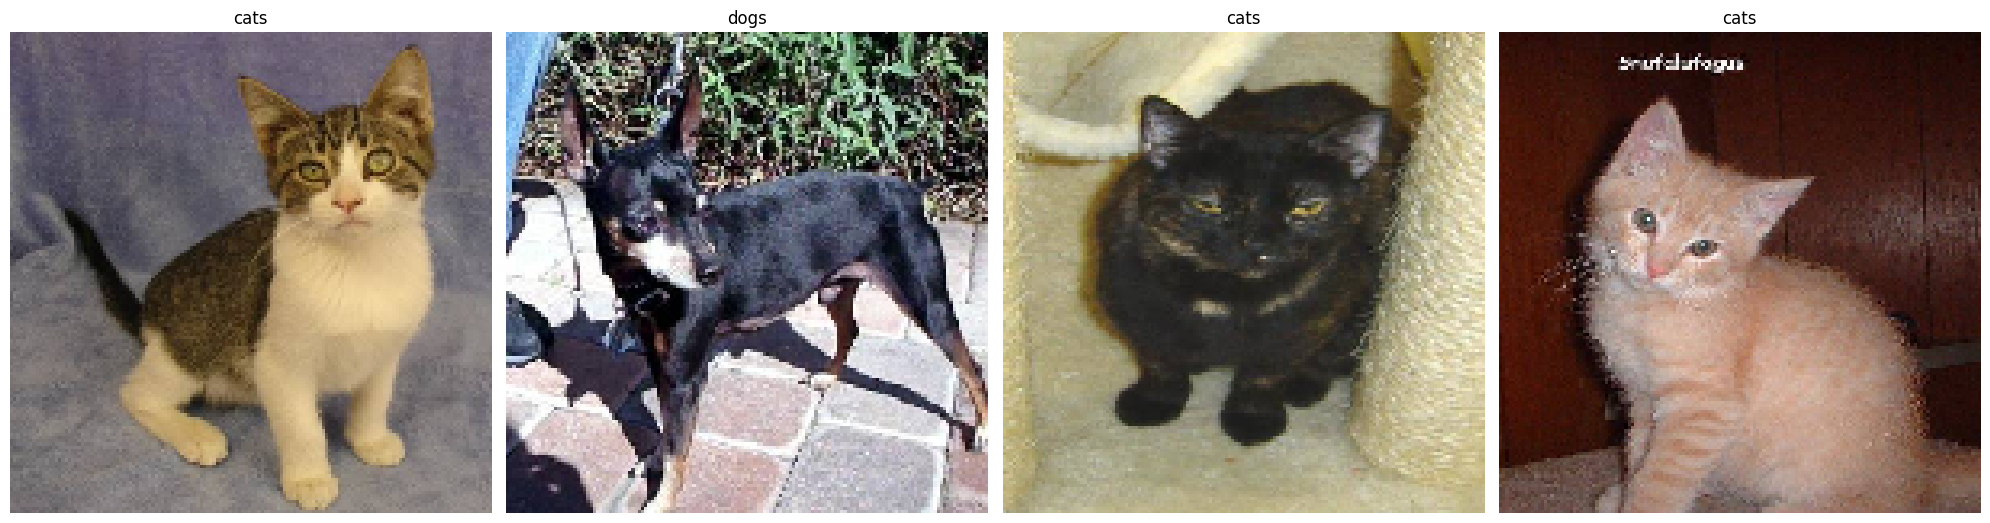

In [16]:
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [17]:
train_generator.reset()

In [18]:
model = models.Sequential([
    layers.Conv2D(32 , (3,3), activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64 , (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128 , (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128 , (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

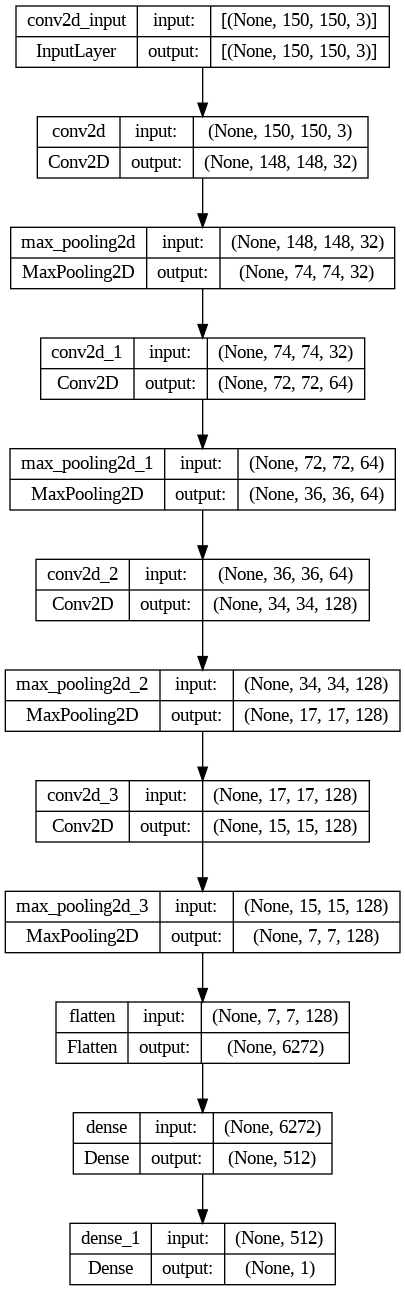

In [20]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [22]:
batch = 20
train_steps = np.ceil(train_generator.samples/batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples/batch)
print(train_steps,validation_steps_per_epoch)

800.0 200.0


In [24]:
history = model.fit(train_generator, epochs=10,batch_size=32, validation_data = validation_generator)

Epoch 1/10
800/800 [==============================] - 41s 45ms/step - loss: 0.6879 - accuracy: 0.5377 - val_loss: 0.6747 - val_accuracy: 0.5692
Epoch 2/10
800/800 [==============================] - 37s 46ms/step - loss: 0.6273 - accuracy: 0.6406 - val_loss: 0.5574 - val_accuracy: 0.7095
Epoch 3/10
800/800 [==============================] - 35s 44ms/step - loss: 0.5106 - accuracy: 0.7473 - val_loss: 0.4553 - val_accuracy: 0.7905
Epoch 4/10
800/800 [==============================] - 35s 43ms/step - loss: 0.4304 - accuracy: 0.8050 - val_loss: 0.4289 - val_accuracy: 0.7995
Epoch 5/10
800/800 [==============================] - 36s 45ms/step - loss: 0.3539 - accuracy: 0.8405 - val_loss: 0.3874 - val_accuracy: 0.8263
Epoch 6/10
800/800 [==============================] - 34s 43ms/step - loss: 0.2846 - accuracy: 0.8760 - val_loss: 0.4034 - val_accuracy: 0.8340
Epoch 7/10
800/800 [==============================] - 34s 43ms/step - loss: 0.2104 - accuracy: 0.9132 - val_loss: 0.4385 - val_accuracy:

In [25]:
history.history

{'loss': [0.6878933906555176,
  0.6272780895233154,
  0.5106111168861389,
  0.4304273724555969,
  0.35393041372299194,
  0.28461527824401855,
  0.2104128897190094,
  0.14601339399814606,
  0.09094206243753433,
  0.06643760204315186],
 'accuracy': [0.5376874804496765,
  0.640625,
  0.7472500205039978,
  0.8050000071525574,
  0.840499997138977,
  0.8759999871253967,
  0.9131875038146973,
  0.9427499771118164,
  0.9639999866485596,
  0.9750000238418579],
 'val_loss': [0.6746642589569092,
  0.5574458241462708,
  0.45526280999183655,
  0.42891377210617065,
  0.38743850588798523,
  0.4033835232257843,
  0.43854525685310364,
  0.5634307265281677,
  0.5790934562683105,
  0.6246156692504883],
 'val_accuracy': [0.5692499876022339,
  0.7095000147819519,
  0.7904999852180481,
  0.7994999885559082,
  0.8262500166893005,
  0.8339999914169312,
  0.8337500095367432,
  0.815750002861023,
  0.8345000147819519,
  0.8442500233650208]}

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
epochs_range = range(len(acc))

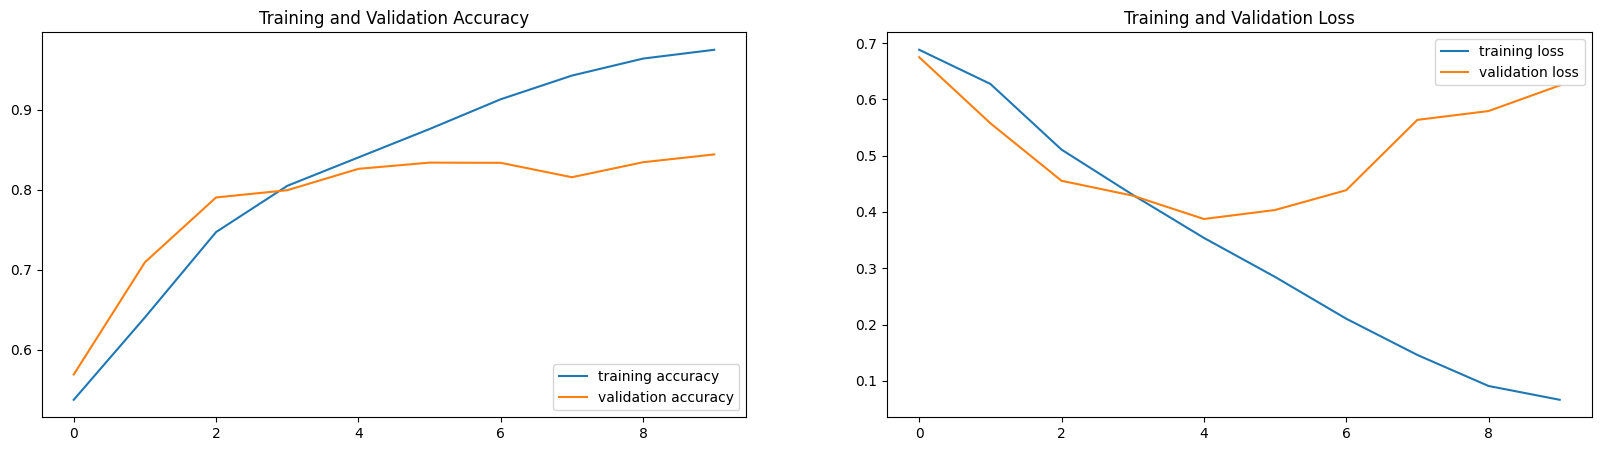

In [28]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='training accuracy')
plt.plot(epochs_range, val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='training loss')
plt.plot(epochs_range, val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/dogs_vs_cats/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode='binary',
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [30]:
test_generator.reset()

In [31]:
true_classes = test_generator.classes

probabilities = model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size))

250/250 [==============================] - 9s 32ms/step


In [32]:
predicted_classes = (probabilities > 0.5).astype(int).squeeze()

In [33]:
class_labels = list(test_generator.class_indices.keys())

In [34]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
cm = confusion_matrix(true_classes, predicted_classes)

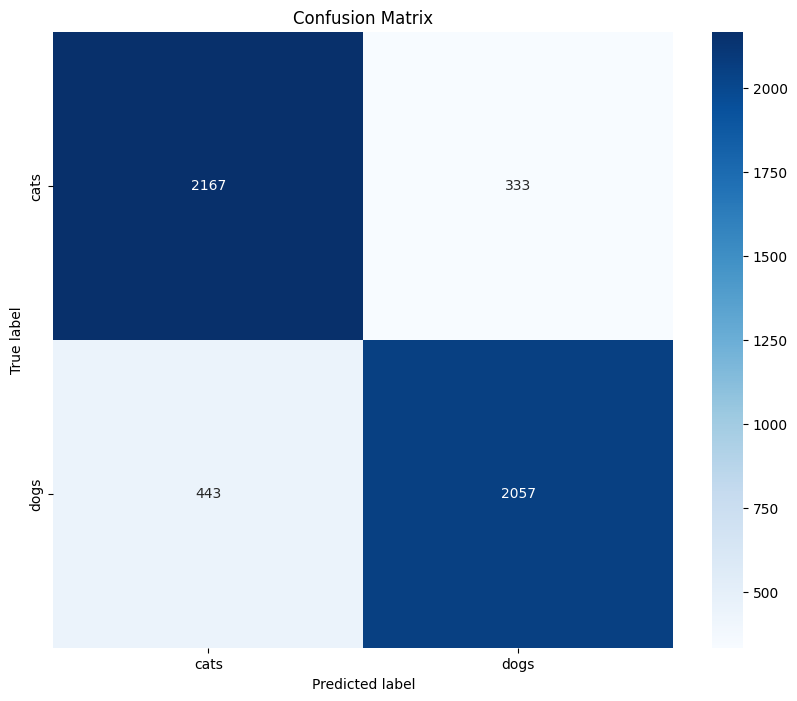

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues",xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [37]:
def make_prediction(img_path):
  img = load_img(img_path, target_size=(150,150))
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.


  prediction = model.predict(img_array)
  print("Prediction:",prediction)


  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1,2,2)
  if prediction[0][0] > 0.5:
    plt.title("Predicted Dog")
  else:
    plt.title("Predicted Cat")
  plt.imshow(img)
  plt.axis("off")

  plt.show()

1/1 [==============================] - 0s 315ms/step
Prediction: [[7.876901e-22]]


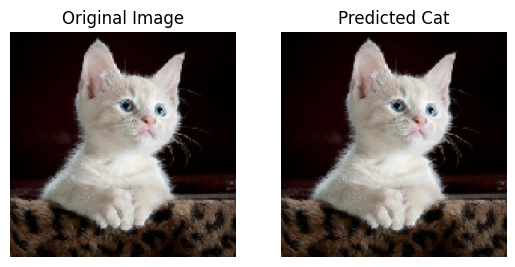

In [38]:
img_path = ("/content/cat.jpeg")
make_prediction(img_path)

1/1 [==============================] - 0s 25ms/step
Prediction: [[0.9999975]]


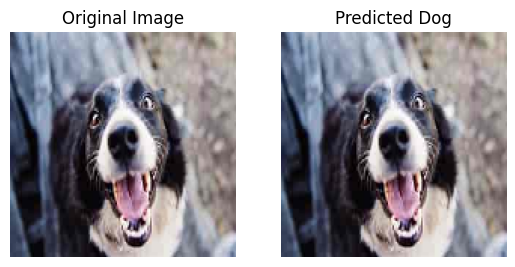

In [39]:
img_path = ("/content/dog.jpeg")
make_prediction(img_path)

1/1 [==============================] - 0s 19ms/step
Prediction: [[0.9998361]]


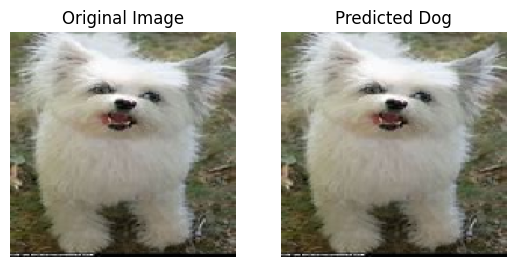

In [40]:
img_path = ("/content/test.jpeg")
make_prediction(img_path)

## MissClassification

In [41]:
test_generator.reset()

prediction = model.predict(test_generator)

predicted_classes = (prediction > 0.5).astype(int).reshape(-1)

true_classes = test_generator.classes

misclassified_indices = np.where(predicted_classes != true_classes)[0]

misclassified_count = len(misclassified_indices)

print(f"Total Misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

250/250 [==============================] - 8s 33ms/step
Total Misclassifications in the test set: 776 out of 5000


In [42]:
filenames = test_generator.filenames

misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total Misclassifications : {len(true_classes)}")

num_samples_to_display = 4

random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

Total Misclassifications : 5000


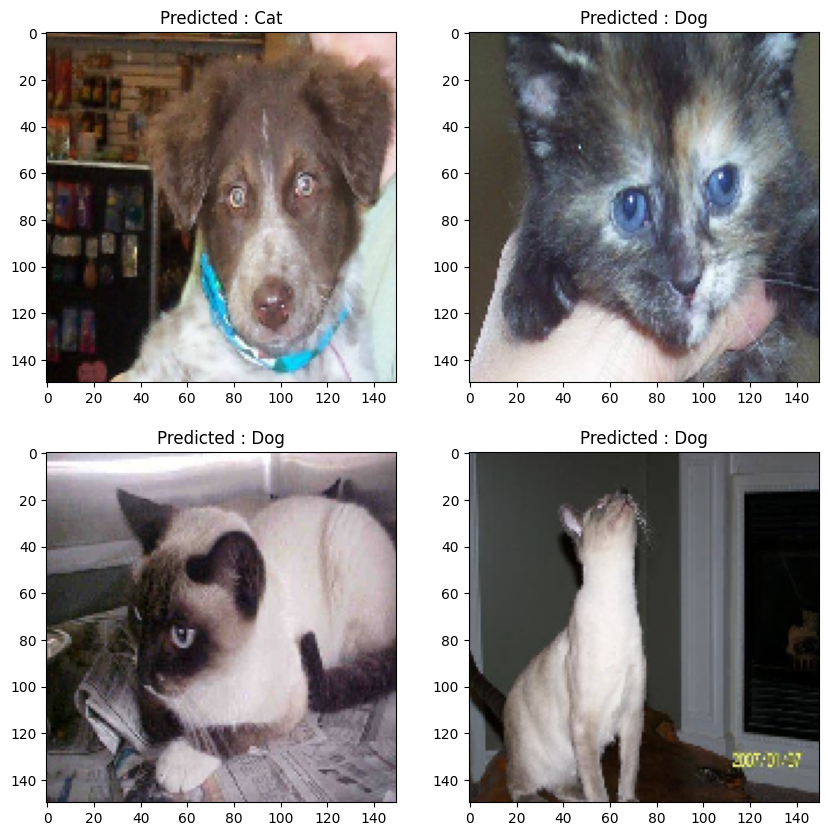

In [43]:
plt.figure(figsize=(10,10))

for i, index in enumerate(random_indices,1):
  img_path = test_dir  + '/' + filenames[index]

  img = load_img(img_path,target_size=(150,150))

  predicted_class = "Dog" if predicted_classes[index] else "Cat"

  plt.subplot(2,2,i)
  plt.imshow(img)
  plt.title(f"Predicted : {predicted_class}")
plt.show()

In [44]:
true_classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)